# Basic operations

### Import libraries

In [1]:
# Libraries

# Basic
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import sys
sys.path.append('..') 

# Local
from src.Utils import DataBaseOperations

# Statistics
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

# Machine learning - metrics
from sklearn.metrics import mean_squared_error, root_mean_squared_error

### Store Raw dataset to DB

In [2]:
df = pd.read_csv('Data/btc_2015_2024.csv')
df.head()

,date,open,high,low,close,volume,rsi_7,rsi_14,cci_7,cci_14,sma_50,ema_50,sma_100,ema_100,macd,bollinger,TrueRange,atr_7,atr_14,next_day_close
0,2015-01-02,314.079010,315.838989,313.565002,315.032013,7860650.0,100.000000,100.000000,-66.666667,-66.666667,314.640503,314.648333,314.640503,314.644418,0.017568,314.640503,2.273987,4.193073,4.275997,281.082001
1,2015-01-03,314.846008,315.149994,281.082001,281.082001,33054400.0,1.938583,2.096744,-100.000000,-100.000000,303.454336,303.009081,303.454336,303.232458,-1.030403,303.454336,34.067993,15.719617,14.951008,264.195007
2,2015-01-04,281.145996,287.230011,257.612000,264.195007,55629100.0,1.235506,1.375421,-110.693896,-110.693896,293.639503,292.715747,293.639503,293.178382,-2.091487,293.639503,29.618011,20.033779,19.034849,274.473999
3,2015-01-05,265.084015,278.341003,265.084015,274.473999,43962800.0,21.462825,19.523695,-76.487357,-76.487357,289.806403,288.769813,289.806403,289.286389,-2.215008,289.806403,14.145996,18.468441,17.907070,286.188995
4,2015-01-06,274.610992,287.553009,272.696014,286.188995,23245700.0,38.272356,34.350787,-37.070244,-37.070244,289.203501,288.295540,289.203501,288.744005,-1.746686,289.203501,14.856995,17.613461,17.300126,294.337006


In [3]:
DBO = DataBaseOperations()
DBO.dataframe_to_sql_table(dataframe=df, table_name="raw")

# Load dataset as pandas Dataframe

In [4]:
df = pd.read_sql_table('raw', DBO.db_engine)
df.head()

,date,open,high,low,close,volume,rsi_7,rsi_14,cci_7,cci_14,sma_50,ema_50,sma_100,ema_100,macd,bollinger,TrueRange,atr_7,atr_14,next_day_close
0,2015-01-02,314.079010,315.838989,313.565002,315.032013,7860650.0,100.000000,100.000000,-66.666667,-66.666667,314.640503,314.648333,314.640503,314.644418,0.017568,314.640503,2.273987,4.193073,4.275997,281.082001
1,2015-01-03,314.846008,315.149994,281.082001,281.082001,33054400.0,1.938583,2.096744,-100.000000,-100.000000,303.454336,303.009081,303.454336,303.232458,-1.030403,303.454336,34.067993,15.719617,14.951008,264.195007
2,2015-01-04,281.145996,287.230011,257.612000,264.195007,55629100.0,1.235506,1.375421,-110.693896,-110.693896,293.639503,292.715747,293.639503,293.178382,-2.091487,293.639503,29.618011,20.033779,19.034849,274.473999
3,2015-01-05,265.084015,278.341003,265.084015,274.473999,43962800.0,21.462825,19.523695,-76.487357,-76.487357,289.806403,288.769813,289.806403,289.286389,-2.215008,289.806403,14.145996,18.468441,17.907070,286.188995
4,2015-01-06,274.610992,287.553009,272.696014,286.188995,23245700.0,38.272356,34.350787,-37.070244,-37.070244,289.203501,288.295540,289.203501,288.744005,-1.746686,289.203501,14.856995,17.613461,17.300126,294.337006


In [5]:
df['date'] = pd.to_datetime(df['date'])
df = df.set_index("date")

In [6]:
df = df.rename_axis(None)
df.head()

,open,high,low,close,volume,rsi_7,rsi_14,cci_7,cci_14,sma_50,ema_50,sma_100,ema_100,macd,bollinger,TrueRange,atr_7,atr_14,next_day_close
2015-01-02,314.079010,315.838989,313.565002,315.032013,7860650.0,100.000000,100.000000,-66.666667,-66.666667,314.640503,314.648333,314.640503,314.644418,0.017568,314.640503,2.273987,4.193073,4.275997,281.082001
2015-01-03,314.846008,315.149994,281.082001,281.082001,33054400.0,1.938583,2.096744,-100.000000,-100.000000,303.454336,303.009081,303.454336,303.232458,-1.030403,303.454336,34.067993,15.719617,14.951008,264.195007
2015-01-04,281.145996,287.230011,257.612000,264.195007,55629100.0,1.235506,1.375421,-110.693896,-110.693896,293.639503,292.715747,293.639503,293.178382,-2.091487,293.639503,29.618011,20.033779,19.034849,274.473999
2015-01-05,265.084015,278.341003,265.084015,274.473999,43962800.0,21.462825,19.523695,-76.487357,-76.487357,289.806403,288.769813,289.806403,289.286389,-2.215008,289.806403,14.145996,18.468441,17.907070,286.188995
2015-01-06,274.610992,287.553009,272.696014,286.188995,23245700.0,38.272356,34.350787,-37.070244,-37.070244,289.203501,288.295540,289.203501,288.744005,-1.746686,289.203501,14.856995,17.613461,17.300126,294.337006


# EDA

### Visualize every column

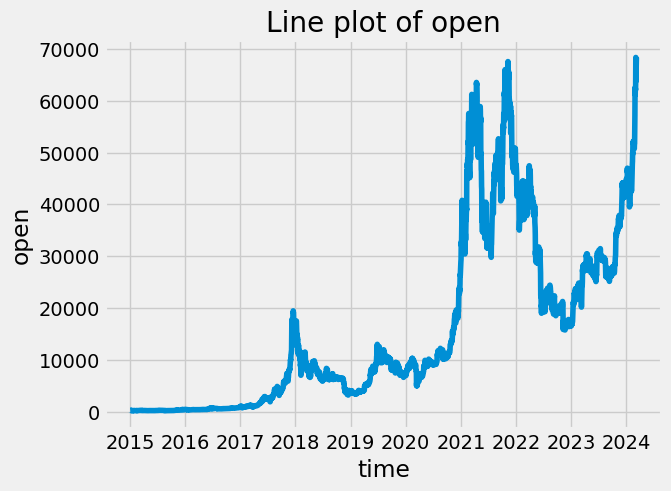

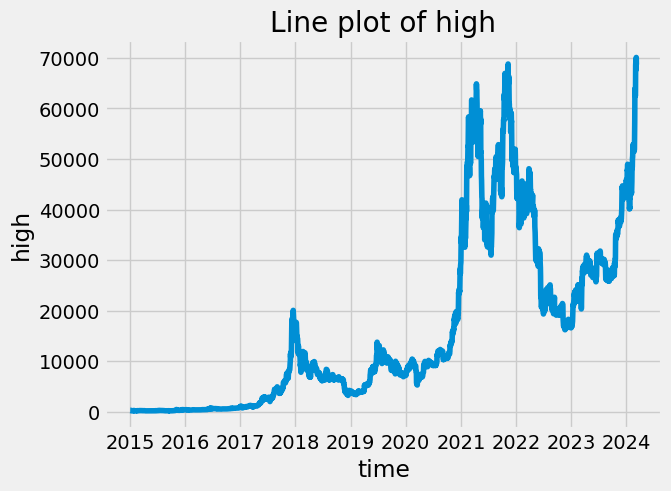

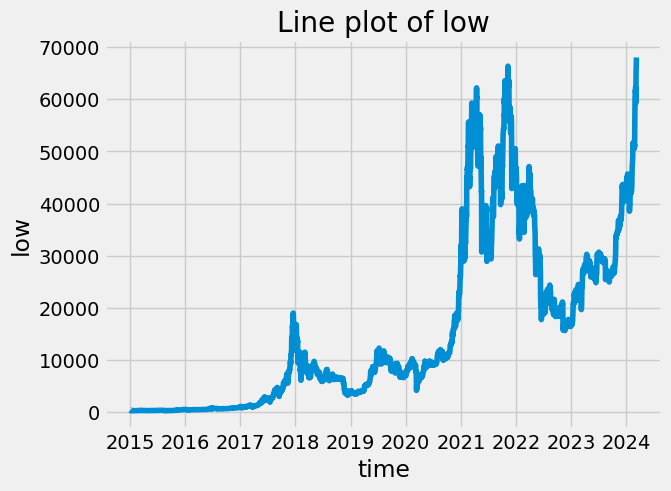

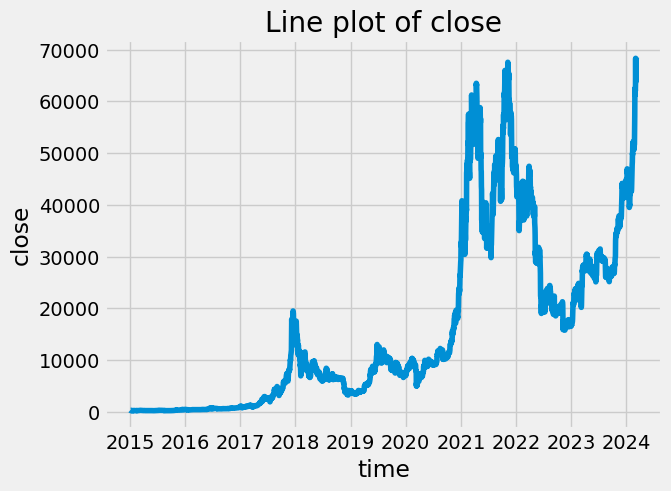

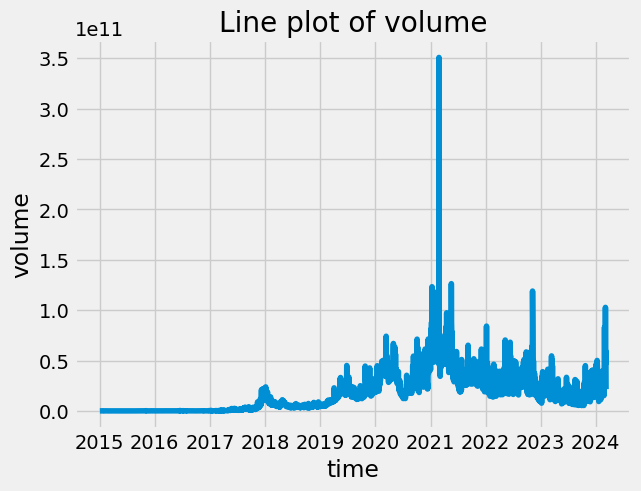

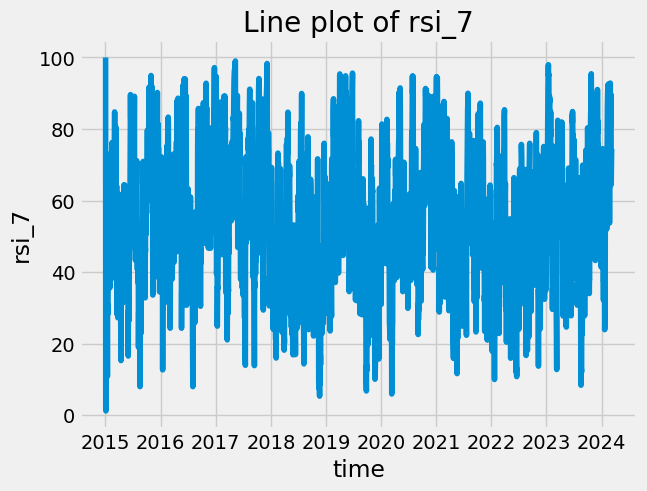

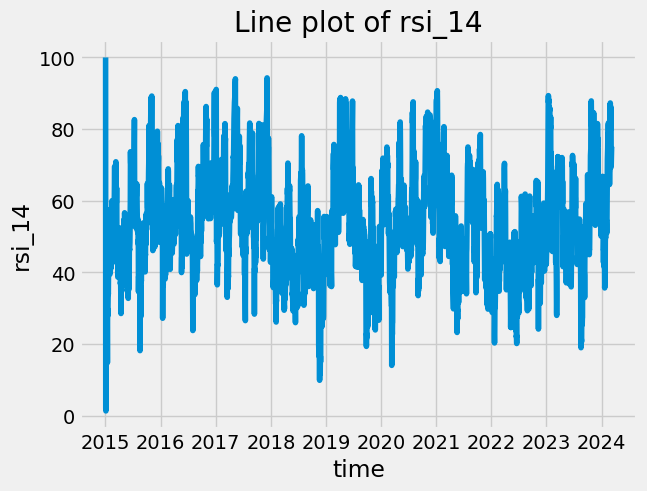

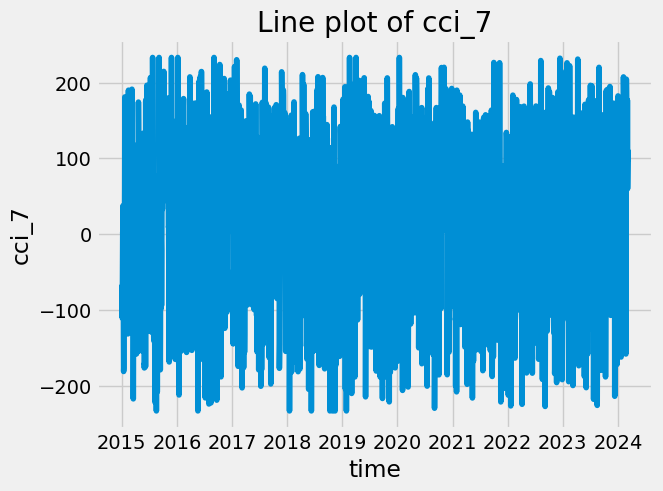

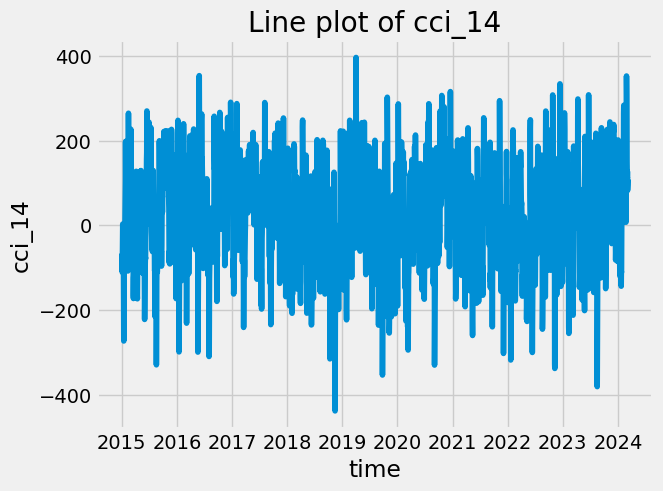

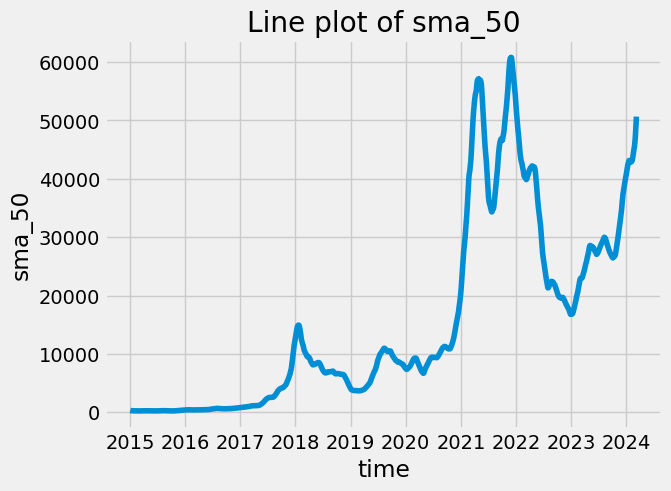

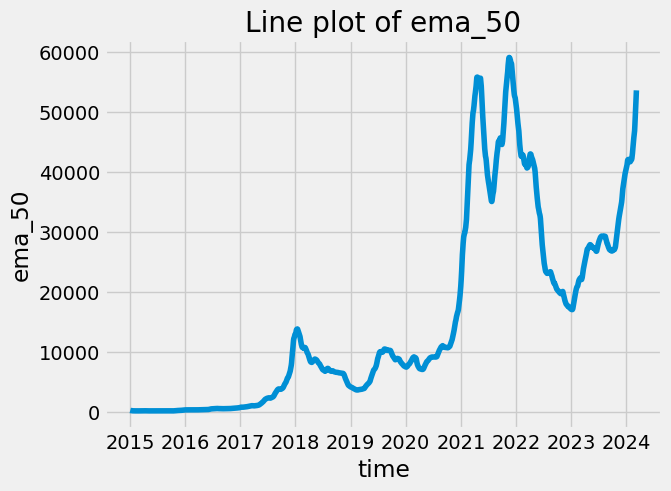

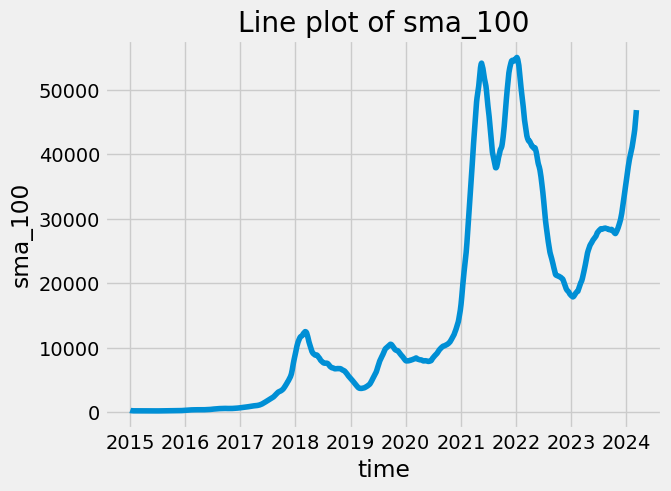

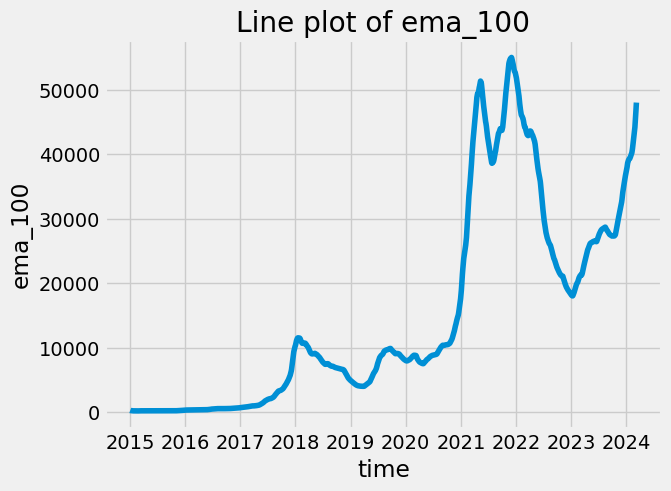

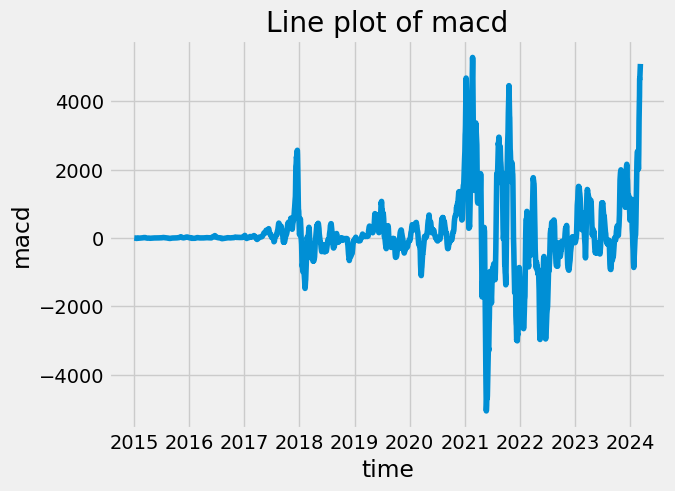

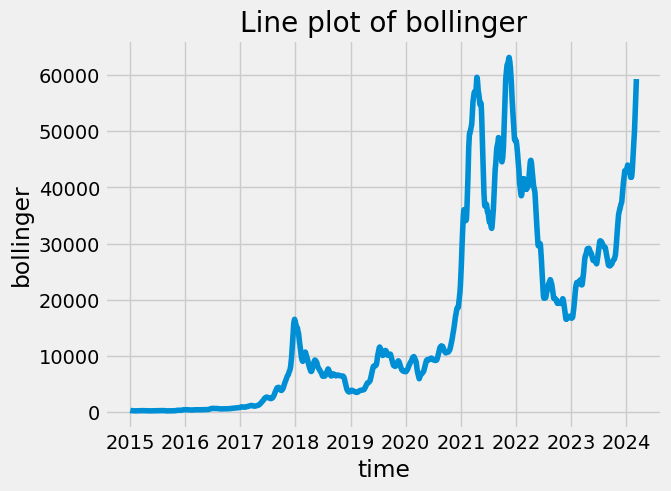

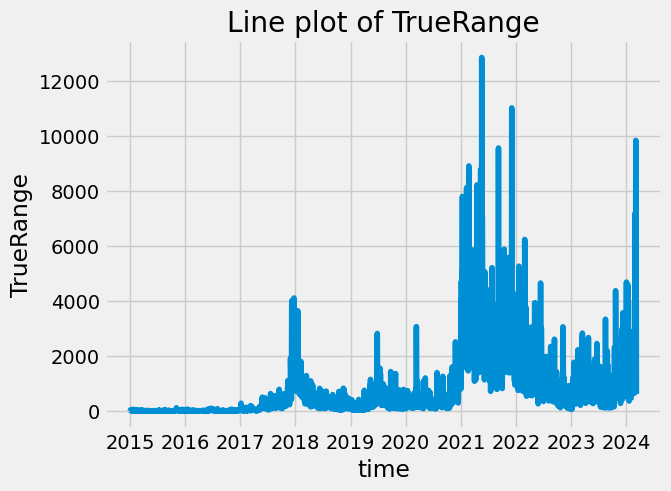

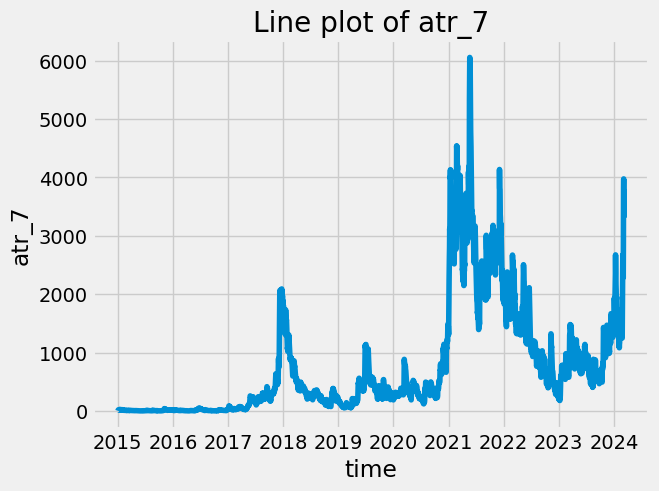

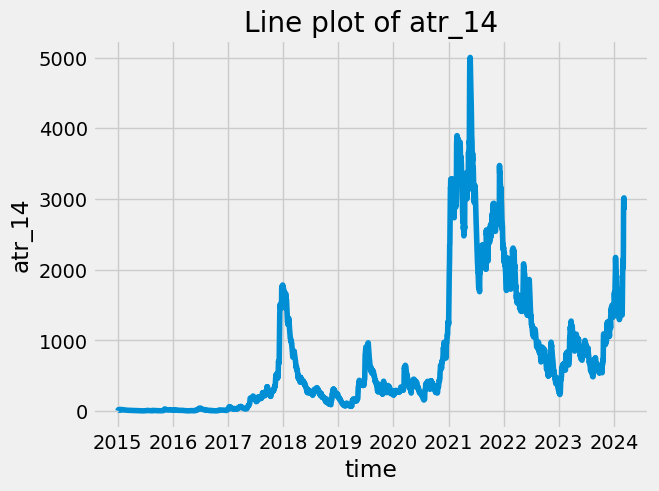

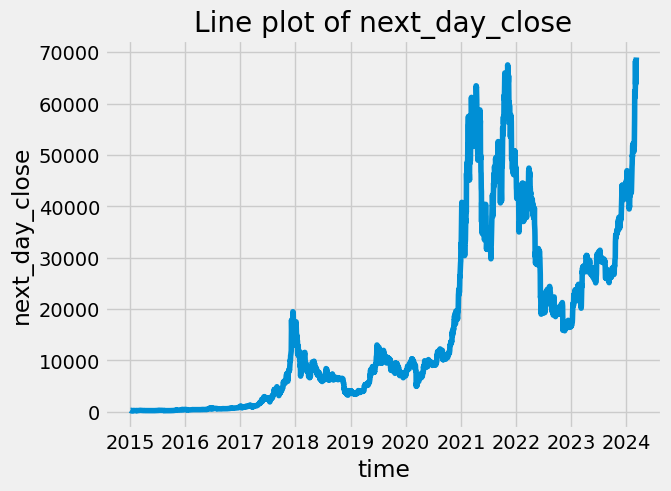

In [9]:
for col in df.columns :

    sns.lineplot(data = df, x = df.index, y = df[col])
    plt.title(f'Line plot of {col}')
    plt.xlabel('time')
    plt.ylabel(f'{col}')
		
    #plt.savefig(os.path.join(r"/Artifacts/EDA/Plots/Histogram KDE QQ plots", f'{col}_histogram_kde_QQ.png'))
        
    plt.show()

We can predict one of Opening price, Highest price, Lowest price, Closing price, Next day closing price because there is not much difference.

In [10]:
# Function
def is_stationery(df, period) :

    sm_a = df["target"].rolling(period).mean()

    plt.figure(figsize = (12, 5))

    plt.plot(df, label = "target")
    plt.plot(sm_a, label = "Simple moving average")

    plt.xlabel('time')
    plt.ylabel('target')
    plt.title('Time series with SMA')
    plt.legend()
    plt.grid(True)
    plt.show()

    adft = adfuller(df['target'])
    adft_results = pd.Series(adft[0 : 4], index = ["Statistic test", "p value", "log", "no. of data points"])
    p = adft_results['p value']
    print(f"p value = {p}")
    if p <= 0.05 :
        print("Time series is stationary.")
    else :
        print("Time series is non stationary.")

In [16]:
df_open = df[['open']]
df_open.rename(columns = {'open' : 'target'}, inplace=True)

In [17]:
df_open

,target
2015-01-02,314.079010
2015-01-03,314.846008
2015-01-04,281.145996
2015-01-05,265.084015
2015-01-06,274.610992
...,...
2024-03-05,68341.054688
2024-03-06,63776.050781
2024-03-07,66099.742188
2024-03-08,66938.093750


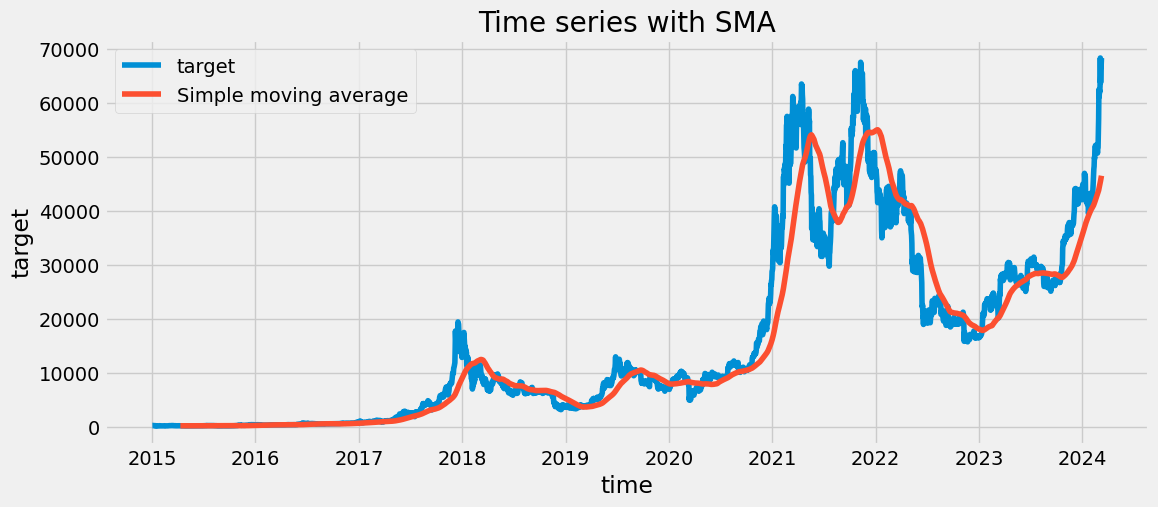

p value = 0.9199064451848391
Time series is non stationary.


In [18]:
is_stationery(df_open, 100)

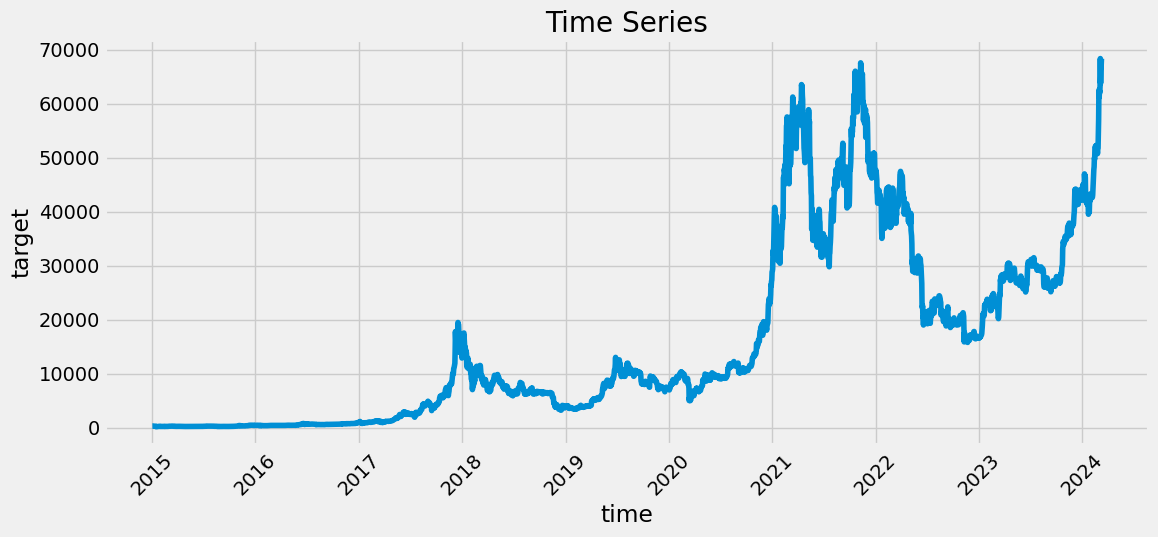

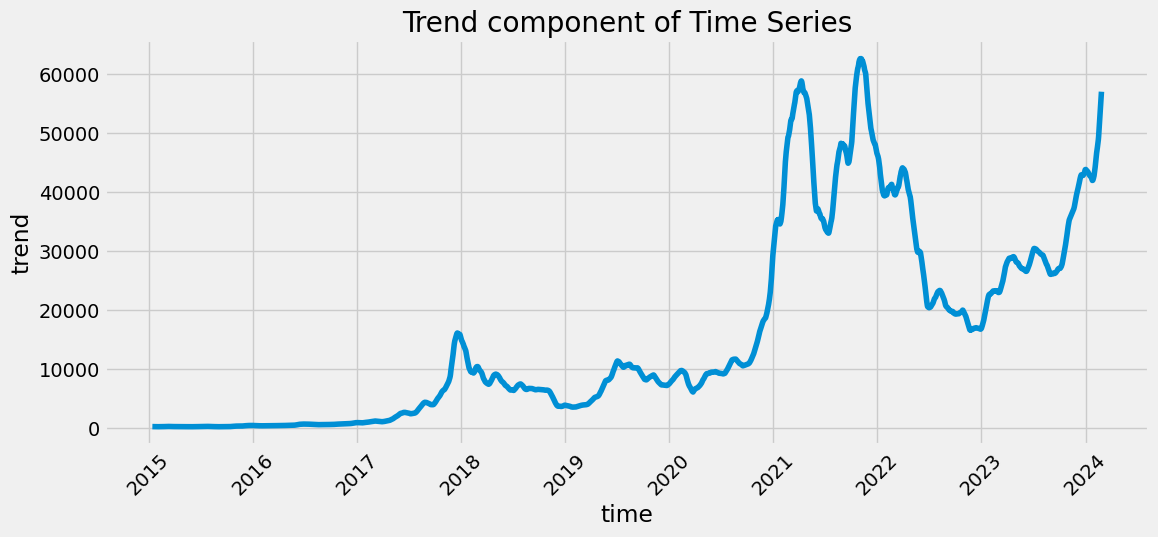

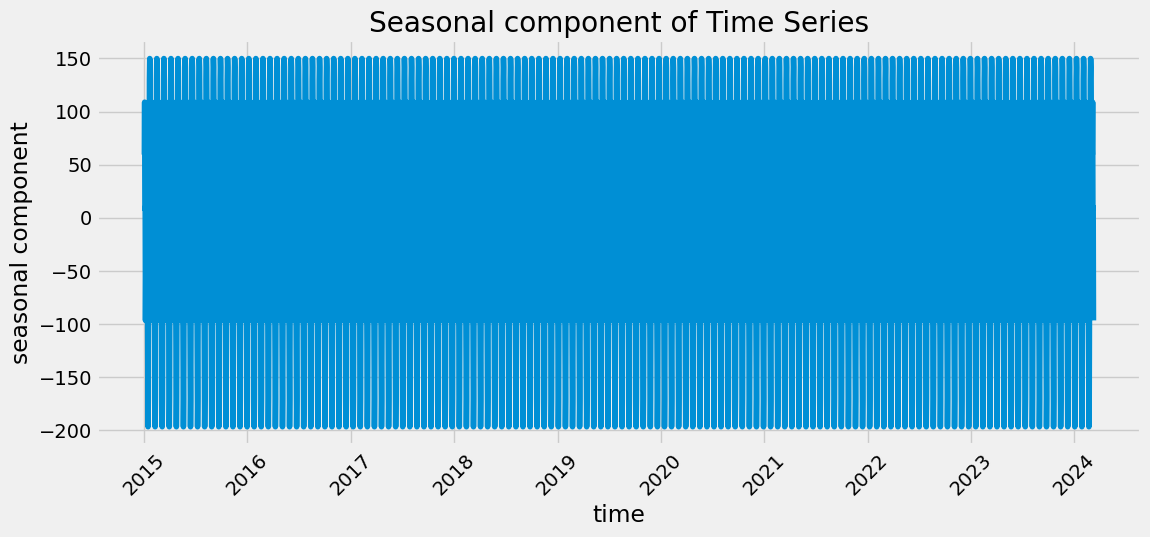

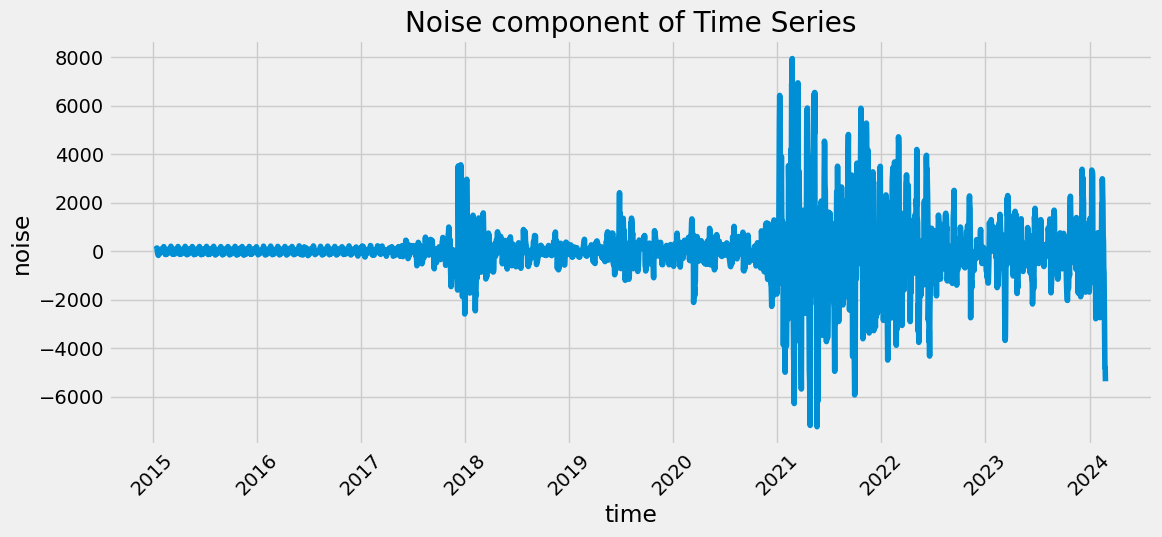

In [19]:
# Additive time series

from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_open, period = 25, model = "additive")

plt.figure(figsize = (12, 5))
sns.lineplot(data = result.observed)
plt.xlabel('time')
plt.ylabel('target')
plt.title('Time Series')
plt.xticks(rotation = 45)
plt.show()

plt.figure(figsize = (12, 5))
sns.lineplot(data = result.trend)
plt.xlabel('time')
plt.ylabel('trend')
plt.title('Trend component of Time Series')
plt.xticks(rotation = 45)
plt.show()

plt.figure(figsize = (12, 5))
sns.lineplot(data = result.seasonal)
plt.xlabel('time')
plt.ylabel('seasonal component')
plt.title('Seasonal component of Time Series')
plt.xticks(rotation = 45)
plt.show()

plt.figure(figsize = (12, 5))
sns.lineplot(data = result.resid)
plt.xlabel('time')
plt.ylabel('noise')
plt.title('Noise component of Time Series')
plt.xticks(rotation = 45)
plt.show()

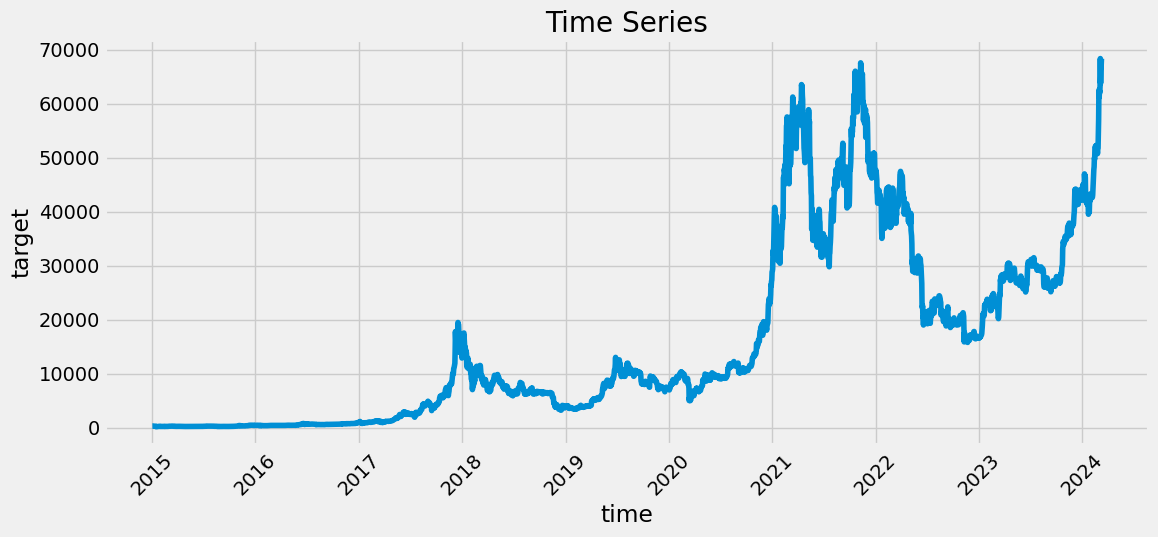

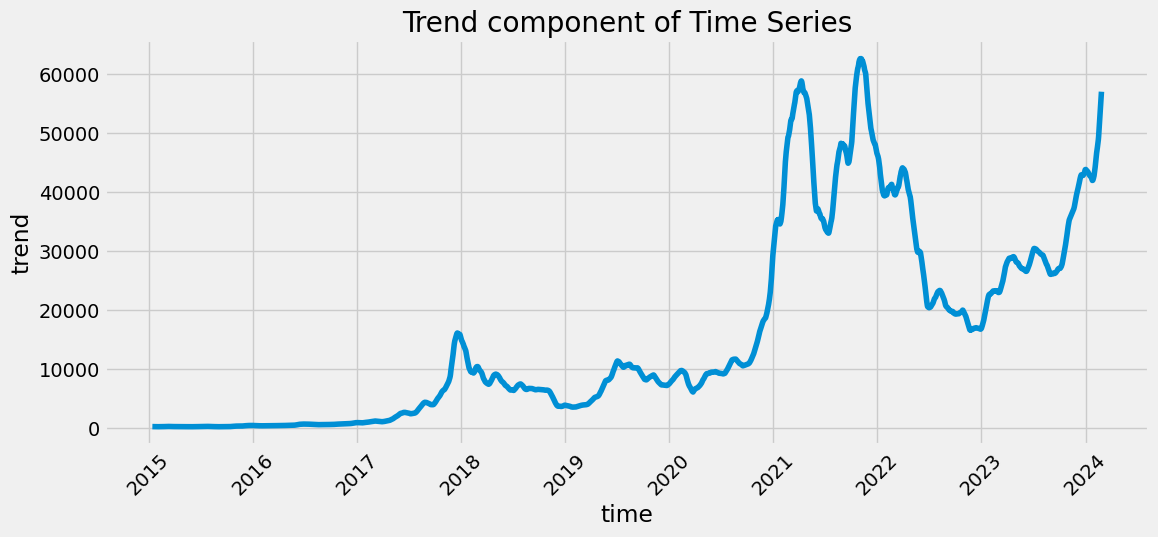

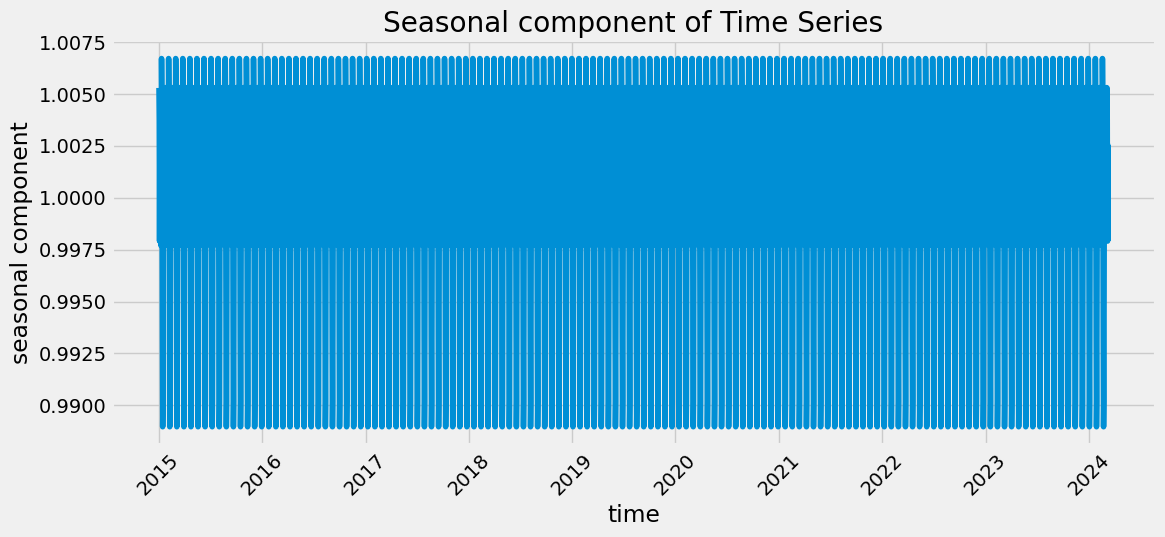

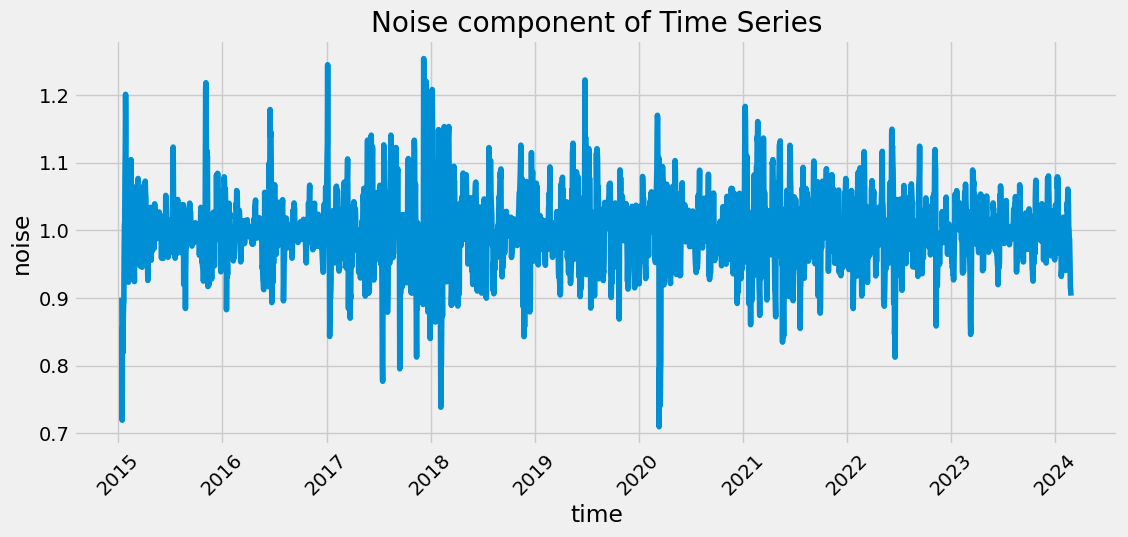

In [20]:
# Multiplicative time series

from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_open, period = 25, model = "multiplicative")

plt.figure(figsize = (12, 5))
sns.lineplot(data = result.observed)
plt.xlabel('time')
plt.ylabel('target')
plt.title('Time Series')
plt.xticks(rotation = 45)
plt.show()

plt.figure(figsize = (12, 5))
sns.lineplot(data = result.trend)
plt.xlabel('time')
plt.ylabel('trend')
plt.title('Trend component of Time Series')
plt.xticks(rotation = 45)
plt.show()

plt.figure(figsize = (12, 5))
sns.lineplot(data = result.seasonal)
plt.xlabel('time')
plt.ylabel('seasonal component')
plt.title('Seasonal component of Time Series')
plt.xticks(rotation = 45)
plt.show()

plt.figure(figsize = (12, 5))
sns.lineplot(data = result.resid)
plt.xlabel('time')
plt.ylabel('noise')
plt.title('Noise component of Time Series')
plt.xticks(rotation = 45)
plt.show()

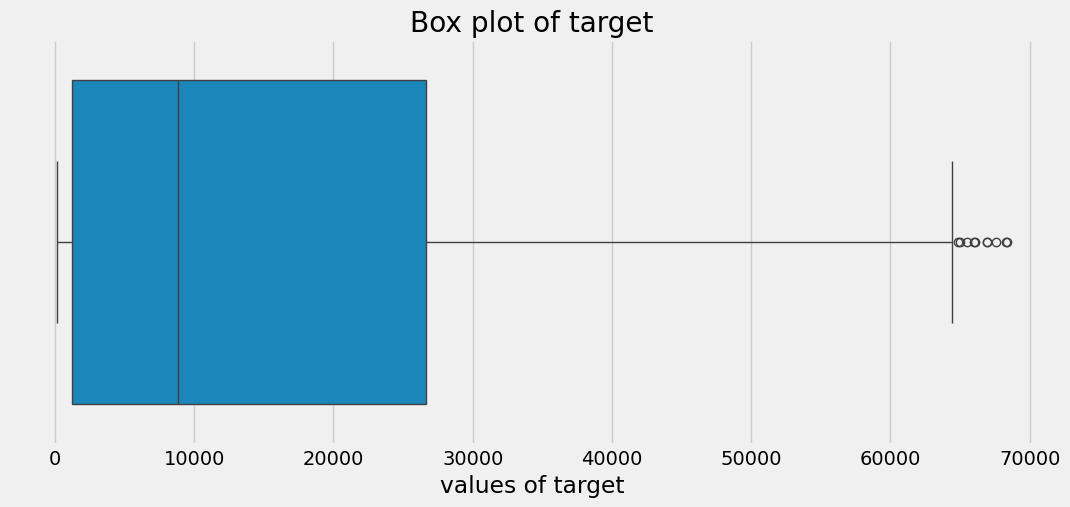

In [21]:
plt.figure(figsize = (12, 5))
sns.boxplot(x = df_open['target'])
plt.xlabel("values of target")
plt.title('Box plot of target')
plt.show()

<Figure size 1200x500 with 0 Axes>

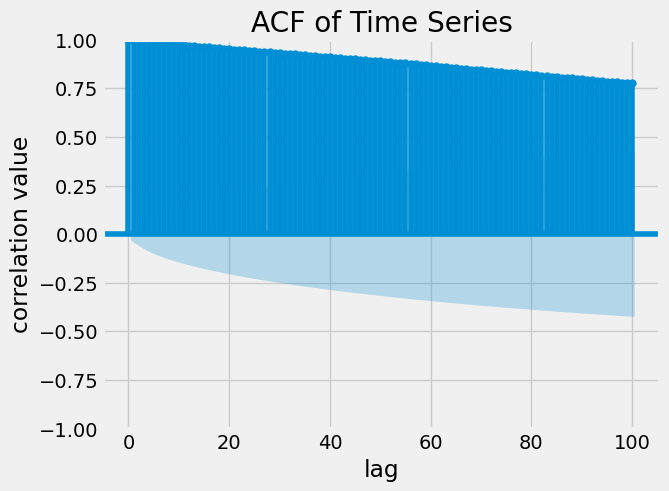

<Figure size 1200x500 with 0 Axes>

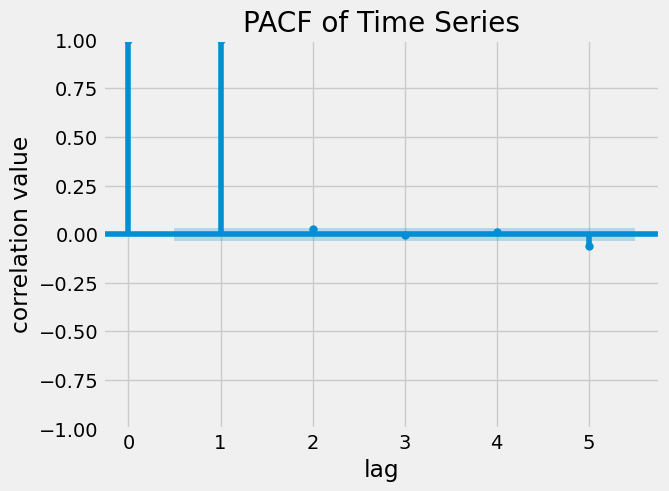

In [38]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize = (12, 5))
plot_acf(df_open, lags=100)
plt.xlabel('lag')
plt.ylabel('correlation value')
plt.title('ACF of Time Series')
plt.show()

plt.figure(figsize = (12, 5))
plot_pacf(df_open, lags=5)
plt.xlabel('lag')
plt.ylabel('correlation value')
plt.title('PACF of Time Series')
plt.show()

# Preprocessing

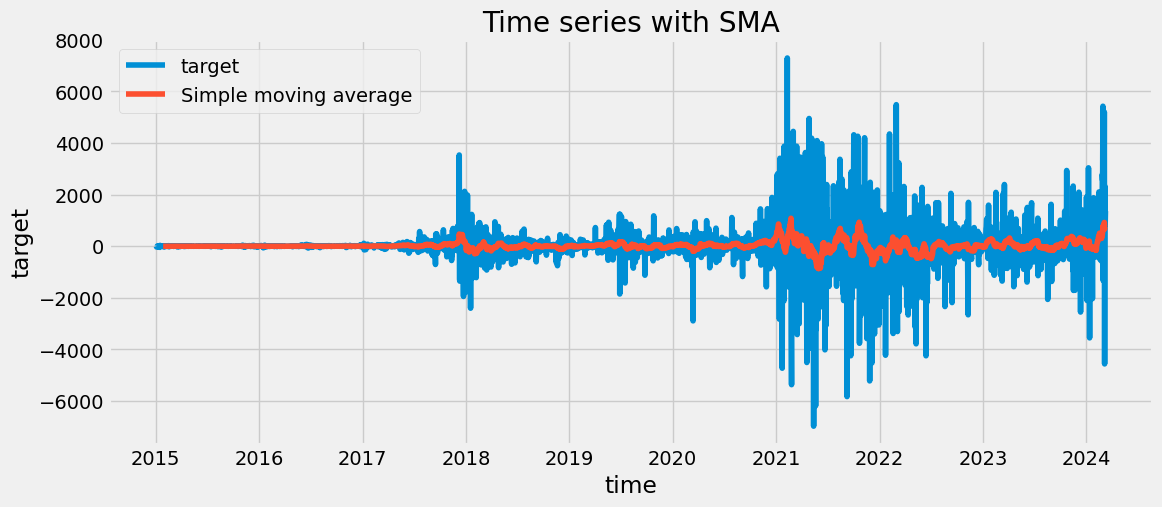

p value = 9.248507206744955e-15
Time series is stationary.


In [24]:
# First differencing

df_copy = df_open.copy(deep = True)

df_differencing_1 = df_copy.diff()
df_differencing_1.dropna(inplace = True)
is_stationery(df_differencing_1, 25)

<Figure size 1200x500 with 0 Axes>

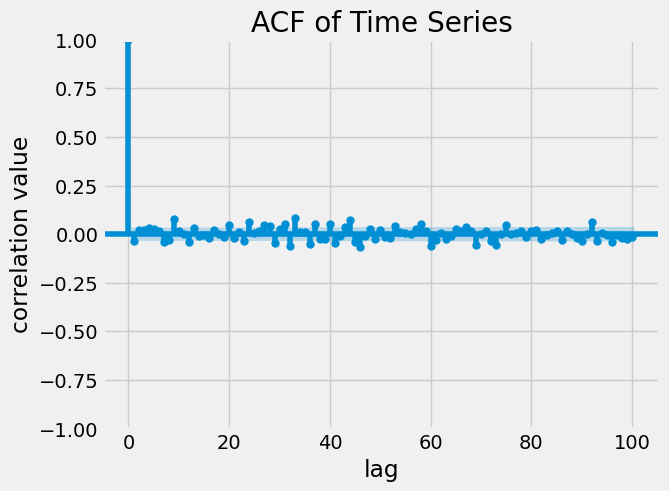

<Figure size 1200x500 with 0 Axes>

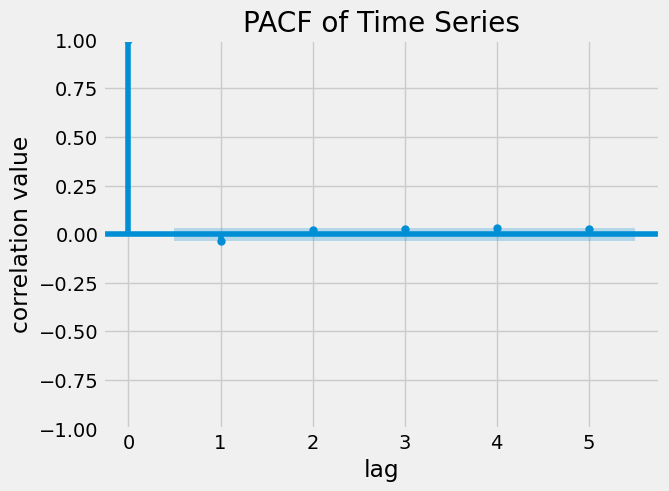

In [37]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize = (12, 5))
plot_acf(df_differencing_1['target'], lags = 100)
plt.xlabel('lag')
plt.ylabel('correlation value')
plt.title('ACF of Time Series')
plt.show()

plt.figure(figsize = (12, 5))
plot_pacf(df_differencing_1['target'], lags = 5)
plt.xlabel('lag')
plt.ylabel('correlation value')
plt.title('PACF of Time Series')
plt.show()

# Model training

In [26]:
df_open

,target
2015-01-02,314.079010
2015-01-03,314.846008
2015-01-04,281.145996
2015-01-05,265.084015
2015-01-06,274.610992
...,...
2024-03-05,68341.054688
2024-03-06,63776.050781
2024-03-07,66099.742188
2024-03-08,66938.093750


In [27]:
train = df_open[df_open.index < '2024-01-01']
test = df_open[df_open.index >= '2024-01-01']

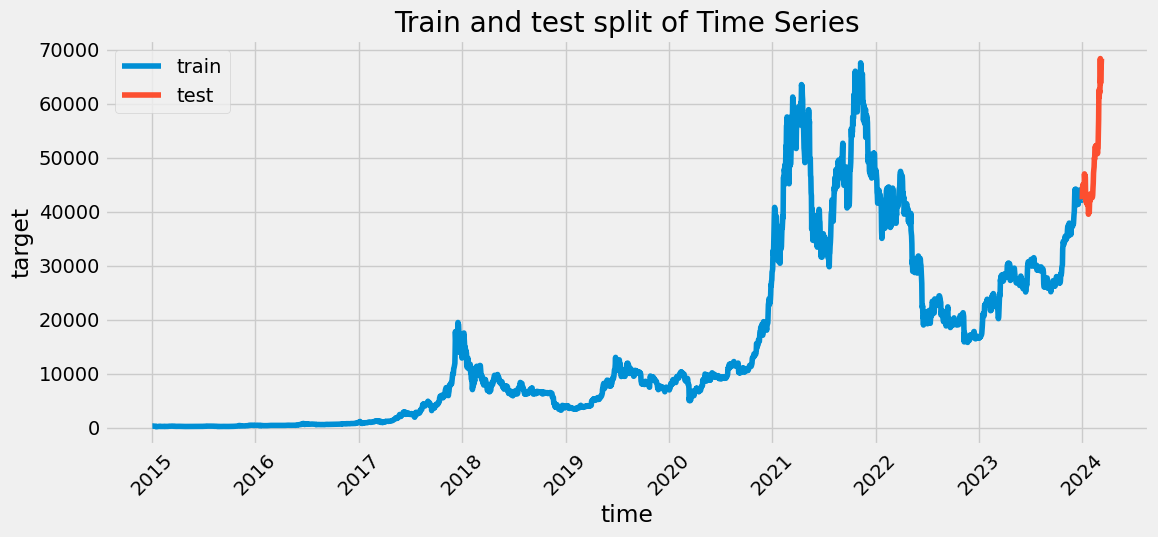

In [28]:
plt.figure(figsize = (12, 5))

plt.plot(train, label = "train")
plt.plot(test, label = "test")
plt.xlabel('time')
plt.ylabel('target')
plt.title('Train and test split of Time Series')
plt.legend()
plt.xticks(rotation = 45)
plt.show()

In [44]:
print(len(train))
print(len(test))

3286
69


In [45]:
history = [x for x in train['target']]
model = ARIMA(history, order = (0, 1, 0))
model

In [46]:
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3286
Model:                 ARIMA(0, 1, 0)   Log Likelihood              -26607.890
Date:                Sun, 31 Mar 2024   AIC                          53217.780
Time:                        23:21:51   BIC                          53223.877
Sample:                             0   HQIC                         53219.963
                               - 3286                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       6.35e+05   5276.030    120.364      0.000    6.25e+05    6.45e+05
===================================================================================
Ljung-Box (L1) (Q):                   3.36   Jarque-Bera (JB):             33543.30
Prob(Q):                              0.07   Prob(JB):                         0.00
Heteroskedasticity (H):              32.12   Skew:                            -0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Model testing

In [48]:
history = [x for x in train['target']]
predictions = list()

for index, row in test.iterrows() :
    
    model = ARIMA(history, order = (0, 1, 0))
    model_fit = model.fit()
    predictions.append(model_fit.forecast(alpha = 0.05)[0])
    history.append(row['target'])

rmse = root_mean_squared_error(test.to_numpy().reshape(-1), predictions)

print(f"RMSE = {rmse} of best model")

RMSE = 1566.3967309465158 of best model


In [49]:
predictions_df = pd.DataFrame(predictions, index = test.index, columns = ['target'])

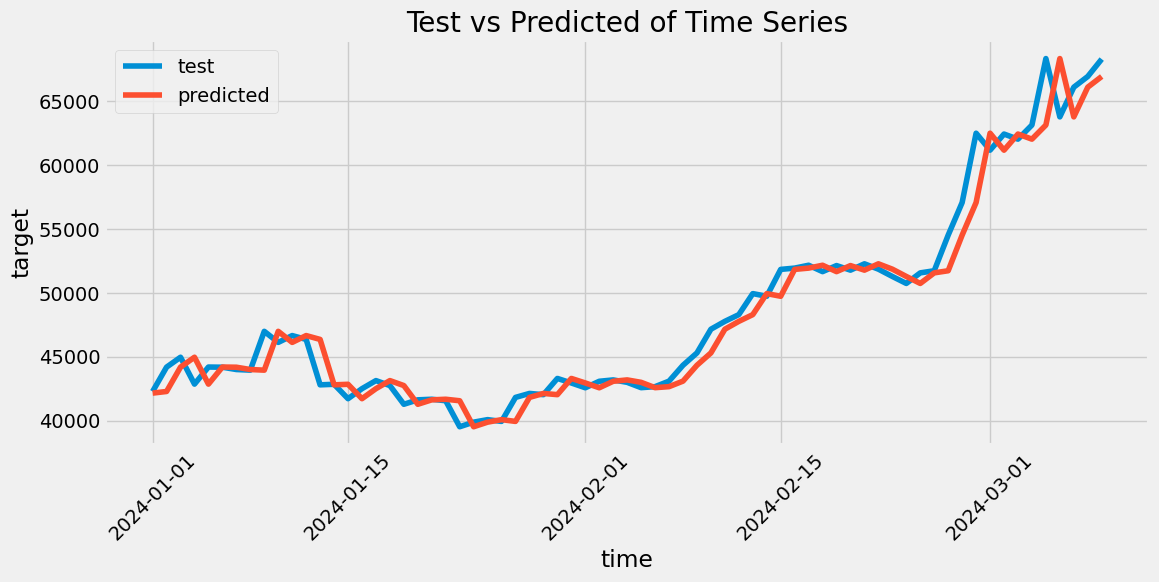

In [50]:
plt.figure(figsize = (12, 5))

plt.plot(test, label = "test")
plt.plot(predictions_df, label = "predicted")
plt.xlabel('time')
plt.ylabel('target')
plt.title('Test vs Predicted of Time Series')
plt.legend()
plt.xticks(rotation = 45)
plt.show()

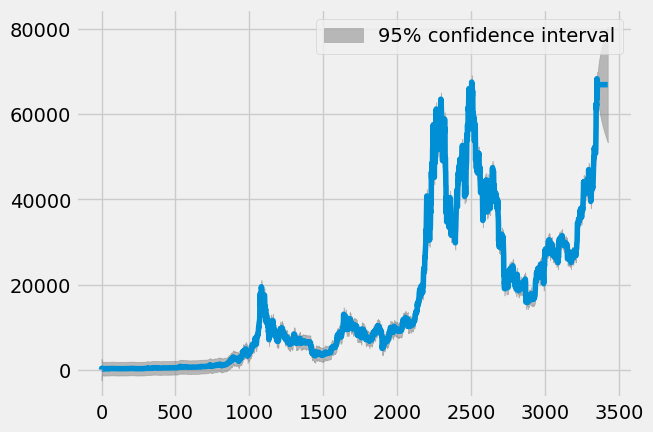

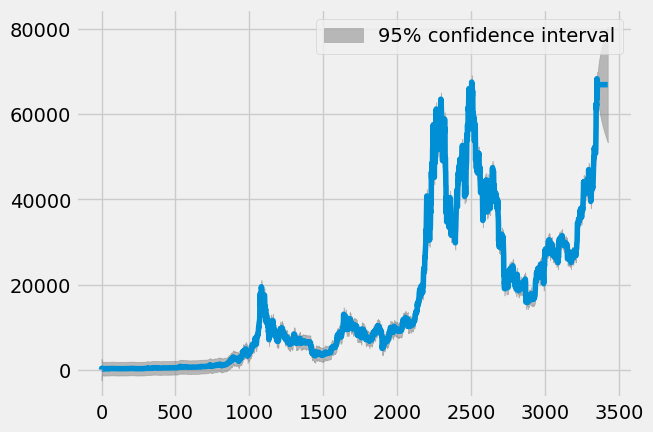

In [52]:
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(model_fit, start=0, end=len(df) + 69)